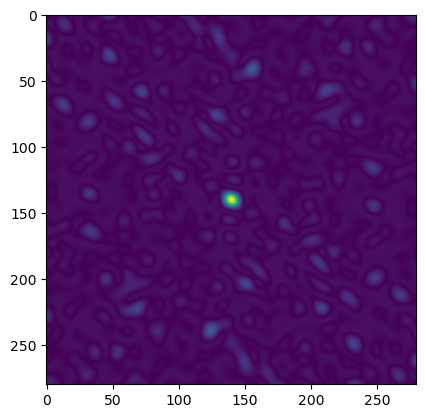

In [1]:
import torch
import forward_map
import numpy as np 
import matplotlib.pyplot as plt 


n_ant = 24
radius = 2.0

min_spacing = 0.2

### Create the fov object once. It should NOT be created each time the array is evaluated
fov = forward_map.SquareFoV(res_arcmin=60,
                theta = 0.0, phi=0.0,
                width_rad=np.radians(140))


## Generate some random antenna positions

x = 2*radius*torch.rand(size=(n_ant,)) - radius
y = 2*radius*torch.rand(size=(n_ant,)) - radius
z = torch.zeros_like(x)

# Score the image
image = forward_map.point_spread_function(x,y,z,fov)

## Now score the image using torch functions.

penalty = forward_map.get_penalty(x,y,z, min_spacing)

plt.imshow(image)